In [113]:
import tensorflow as tf

import pandas as pd
import numpy as np

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [114]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
data[data['Name'].str.contains('|'.join(['Jonkheer\.', 'Countess\.', 'Sir\.', 'Capt\.', 'Mrs\.', 'Miss\.', 'Mr\.', 'Master\.', 'Rev\.', 'Dr\.', 'Mlle\.', 'Col\.', 'Don\.', 'Mme\.', 'Ms\.', 'Major\.', 'Lady\.']))  == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [116]:
def getTitle(name):
    if ('Jonkheer.' in name):
        return 0
    elif ('Countess.' in name):
        return 1
    elif ('Sir.' in name):
        return 2
    elif ('Capt.' in name):
        return 3
    elif ('Mrs.' in name):
        return 4
    elif ('Miss.' in name): 
        return 5
    elif ('Mr.' in name):
        return 6
    elif('Master.' in name):
        return 7
    elif ('Rev.' in name):
         return 8
    elif ('Dr.' in name):
        return 9
    elif ('Mlle.' in name):
        return 10
    elif('Col.' in name):
        return 11
    elif('Don.' in name):
        return 12
    elif('Mme.' in name):
        return 13
    elif('Ms.' in name):
        return 14
    elif('Major.' in name):
        return 15
    elif('Lady.' in name):
        return 16
    else:
        return 17

In [117]:
data['Title'] = data['Name'].apply(lambda x: getTitle(x))
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,6
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,6


In [118]:
cabin = data.pop('Cabin')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,6
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,6


In [119]:
tmp = data[data['Embarked'].isnull()]
tmp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,5
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,4


In [120]:
data['Embarked']=data['Embarked'].fillna('C')
data[data['Fare'] == 80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,C,5
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,C,4


In [121]:
data = data.dropna()
len(data)

714

In [122]:
data['family'] = data['SibSp'] + data['Parch']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,6,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,4,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,5,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,4,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,6,0


In [99]:
mean = data['Age'].median()
mean

28.0

In [100]:
data['Age'].isnull().sum()

177

In [101]:
data['Age'] = data['Age'].fillna(mean)

In [102]:
data['Age'].isnull().sum()

0

In [123]:
train, test = train_test_split(data, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)

print(len(train))
print(len(val))
print(len(test))

456
115
143


In [124]:
def df_to_dataset(df, shuffle=False, batch_size=32):
    df = df.copy()
    labels = df.pop('Survived')
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(df))
    ds = ds.batch(batch_size)
    return ds

In [125]:
train_ds = df_to_dataset(train, shuffle=True)
val_ds = df_to_dataset(val)
test_ds = df_to_dataset(test)

In [126]:
feature_columns = []

for header in ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    feature_columns.append(feature_column.numeric_column(header))
    
age = feature_column.numeric_column('Age')
age_buckets = feature_column.bucketized_column(age, boundaries=[10, 20, 30, 40, 50, 60, 70])
feature_columns.append(age_buckets)

sex = feature_column.categorical_column_with_vocabulary_list('Sex', ['male', 'female'])
sex_one_hot = feature_column.indicator_column(sex)
feature_columns.append(sex_one_hot)

embarked = feature_column.categorical_column_with_vocabulary_list('Embarked', ['S', 'C', 'Q'])
embarked_one_hot = feature_column.indicator_column(embarked)
feature_columns.append(embarked_one_hot)

family = feature_column.categorical_column_with_vocabulary_list(
        'family', data['family'].unique())
feature_columns.append(feature_column.indicator_column(family))

title = feature_column.categorical_column_with_vocabulary_list(
        'Title', data['Title'].unique())
feature_columns.append(feature_column.indicator_column(title))

# ticket = feature_column.categorical_column_with_vocabulary_list(
#         'Ticket', data['Ticket'].unique())
# ticket_embedding = feature_column.embedding_column(ticket, dimension=8)
# feature_columns.append(ticket_embedding)

In [127]:
feature_layer = layers.DenseFeatures(feature_columns)

In [132]:
model = tf.keras.Sequential([
    feature_layer,
    layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=200, callbacks=[early_stop])

Epoch 1/200
15/15 [==============================] - 1s 43ms/step - loss: 1.5685 - accuracy: 0.5947 - val_loss: 1.0055 - val_accuracy: 0.6696
Epoch 2/200
15/15 [==============================] - 0s 28ms/step - loss: 1.1382 - accuracy: 0.6141 - val_loss: 0.9301 - val_accuracy: 0.6870
Epoch 3/200
15/15 [==============================] - 0s 27ms/step - loss: 1.0040 - accuracy: 0.6209 - val_loss: 0.8824 - val_accuracy: 0.6870
Epoch 4/200
15/15 [==============================] - 0s 28ms/step - loss: 1.0937 - accuracy: 0.6314 - val_loss: 0.8890 - val_accuracy: 0.6522
Epoch 5/200
15/15 [==============================] - 0s 27ms/step - loss: 1.0161 - accuracy: 0.5810 - val_loss: 0.9919 - val_accuracy: 0.6087
Epoch 6/200
15/15 [==============================] - 0s 28ms/step - loss: 0.8804 - accuracy: 0.6400 - val_loss: 0.8047 - val_accuracy: 0.6783
Epoch 7/200
15/15 [==============================] - 0s 27ms/step - loss: 0.9205 - accuracy: 0.6565 - val_loss: 0.7183 - val_accuracy: 0.7391
Epoch 

15/15 [==============================] - 0s 28ms/step - loss: 0.5201 - accuracy: 0.8145 - val_loss: 0.6582 - val_accuracy: 0.8000
Epoch 59/200
15/15 [==============================] - 0s 28ms/step - loss: 0.5218 - accuracy: 0.8191 - val_loss: 0.6432 - val_accuracy: 0.7913
Epoch 60/200
15/15 [==============================] - 0s 28ms/step - loss: 0.5011 - accuracy: 0.8057 - val_loss: 0.6410 - val_accuracy: 0.7913
Epoch 61/200
15/15 [==============================] - 0s 28ms/step - loss: 0.4938 - accuracy: 0.8300 - val_loss: 0.6419 - val_accuracy: 0.7826
Epoch 62/200
15/15 [==============================] - 0s 28ms/step - loss: 0.5075 - accuracy: 0.8104 - val_loss: 0.6465 - val_accuracy: 0.7826
Epoch 63/200
15/15 [==============================] - 0s 29ms/step - loss: 0.4879 - accuracy: 0.8114 - val_loss: 0.6602 - val_accuracy: 0.8000
Epoch 64/200
15/15 [==============================] - 0s 28ms/step - loss: 0.5139 - accuracy: 0.8033 - val_loss: 0.6643 - val_accuracy: 0.7913
Epoch 65/200

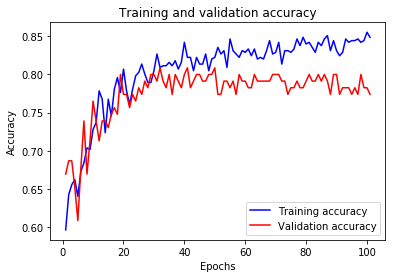

In [133]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'b', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()